<a href="https://colab.research.google.com/github/Sanika881/Dataset-Analysis/blob/main/used_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sanika Kadam

Class: SY BCA(A)

Roll No: 5825

College: Pillai college of arts commerce and science

Dataset: Used car dataset

---



# 1. Importing the data

In [ ]:
# importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv('/content/data_science_project_carDataset1.csv')


First five rows from the dataset

In [ ]:
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


Last five rows from the dataset

In [ ]:
data.tail()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [ ]:
print(data['selling_price'].value_counts())


selling_price
450000     357
550000     334
650000     330
350000     320
500000     271
          ... 
117000       1
1064000      1
1472000      1
326000       1
456000       1
Name: count, Length: 1086, dtype: int64


<Axes: xlabel='selling_price', ylabel='count'>

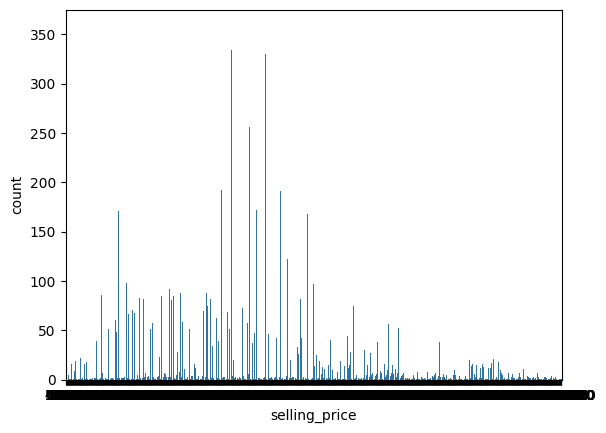

In [ ]:
import seaborn as sns
sns.countplot(x='selling_price', data=data)


# 2. Checking Duplicates

In [ ]:
duplicates = data.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")
data = data.drop_duplicates()


Number of duplicates: 0


# 3. Check Data Inconsistencies
Box Plot  for outliers using statistical methods

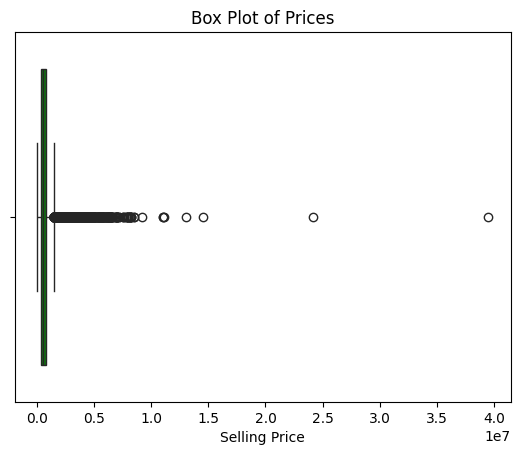

In [ ]:
sns.boxplot(x=data['selling_price'], color='green')
plt.title('Box Plot of Prices')
plt.xlabel('Selling Price')
plt.show()


# 4. Check Missing Values

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


# 5. Treat Missing Values

In [ ]:
data['mileage'] = data['max_power'].fillna(data['km_driven'].mean())
print("done")

done


# 6. Exploratory Data Analysis (EDA)

## Histogram

Purpose: Understand the distribution of car prices in the dataset.

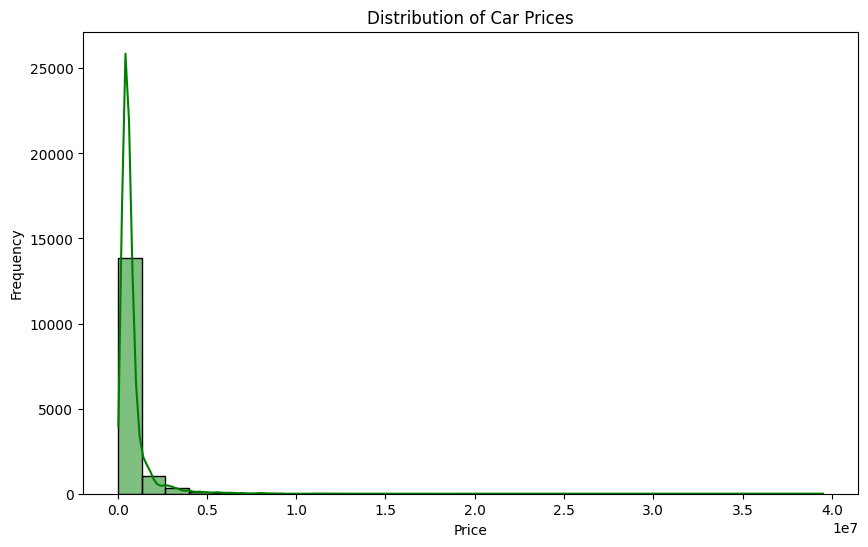

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], bins=30, kde=True, color='green')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Scatter Plot

Purpose: Explore the relationship between mileage and price

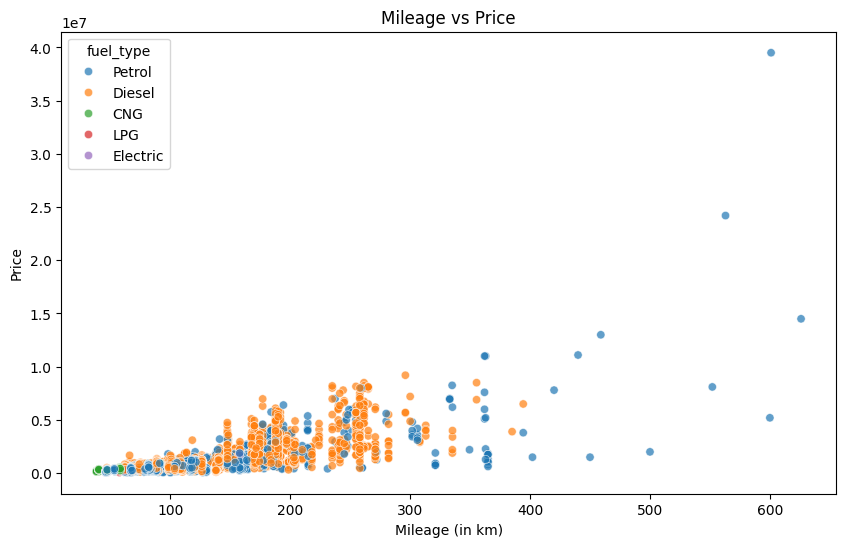

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='mileage', y='selling_price', hue='fuel_type', alpha=0.7)
plt.title('Mileage vs Price')
plt.xlabel('Mileage (in km)')
plt.ylabel('Price')
plt.show()


# Bar Chart
Purpose: Compare the average price of cars by brand to see which brands are more expensive.

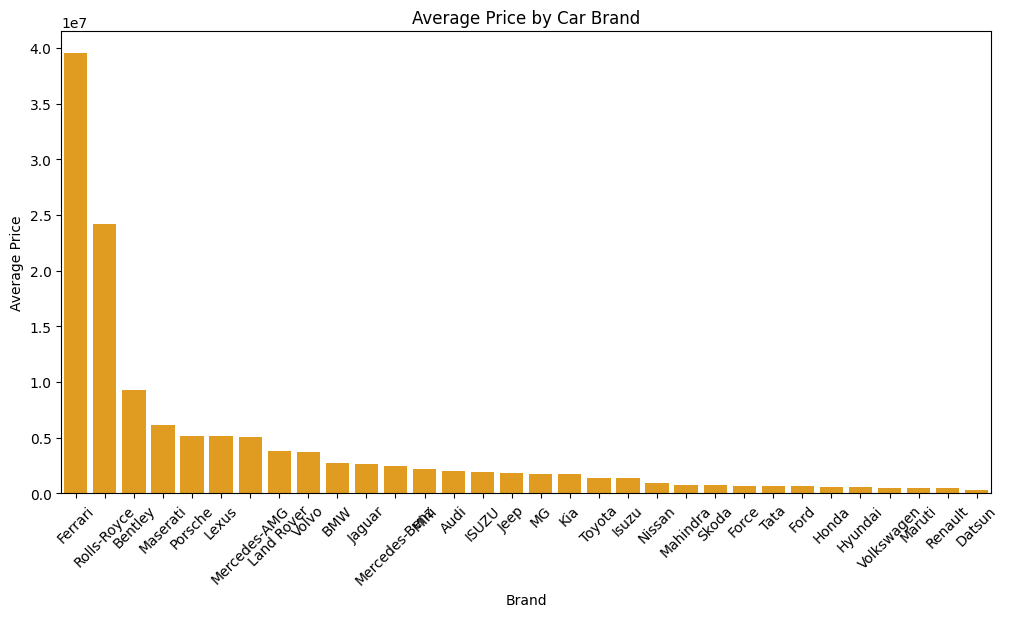

In [ ]:
plt.figure(figsize=(12, 6))
avg_price_by_brand = data.groupby('brand')['selling_price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, color='orange')
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


# HeatMap

Purpose: To Spot Trends or Insights

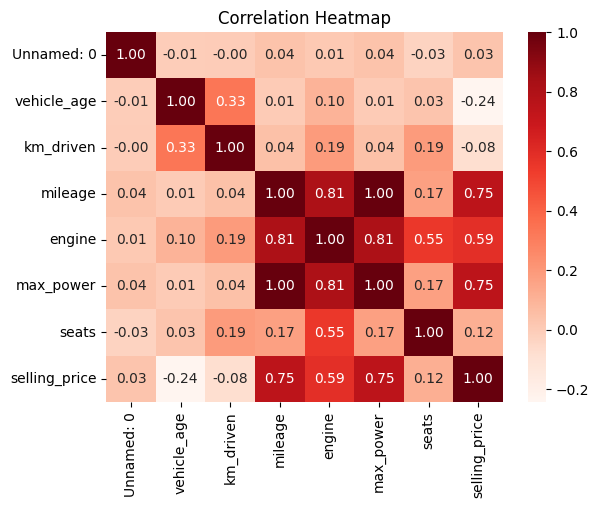

In [ ]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# 7. Scaling (Standardization/Normalization)

In [ ]:
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])
print("Scaling Applied")

Scaling Applied


# 8. Encoding (Convert categorical variables to numerical)

In [ ]:
data = pd.get_dummies(data, drop_first=True)
print("Encoding Completed")

Encoding Completed


# 9. Split Data into Train and Test

In [ ]:
X = data.drop(columns=['selling_price'])
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Split into Train and Test")

Data Split into Train and Test


# 10. Apply Machine Learning Models

In [ ]:
#Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = r2_score(y_test, rf_pred)
print(f"Random Forest R² Score: {rf_accuracy}")

Random Forest R² Score: 0.9321486393086262


In [ ]:
#Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = r2_score(y_test, dt_pred)
print(f"Decision Tree R² Score: {dt_accuracy}")

Decision Tree R² Score: 0.8714395746030787


In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = r2_score(y_test, lr_pred)
print(f"Linear Regression R² Score: {lr_accuracy}")

result=pd.DataFrame({"Actual":y_test,"Predicted":lr_pred})
result.head(10)

Linear Regression R² Score: -1.553863751503967e+17


,Actual,Predicted
3334,-0.654257,-0.785015
10928,-0.195695,-0.174026
2518,-0.122997,-0.175224
11322,0.889195,0.498903
9394,-0.687811,-0.933197
13649,-0.111812,-0.375471
11892,-0.346685,-0.504128
5133,-0.575966,-0.585569
1611,-0.531229,-0.466429
8137,0.083916,1.177958


In [ ]:
# Logistic Regression (for a classification task)
y_class = (y > y.median()).astype(int)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train_class, y_train_class)
log_reg_pred = log_reg_model.predict(X_test_class)
log_reg_accuracy = accuracy_score(y_test_class, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")

Logistic Regression Accuracy: 0.9179370742783004


In [ ]:
# Feedforward Neural Network (FNN)
fnn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

fnn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

fnn_pred = fnn_model.predict(X_test).flatten()
fnn_accuracy = r2_score(y_test, fnn_pred)
print(f"FNN R² Score: {fnn_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3403 - mae: 0.2224 - val_loss: 0.1862 - val_mae: 0.1483
Epoch 2/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2331 - mae: 0.1474 - val_loss: 0.1685 - val_mae: 0.1464
Epoch 3/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2487 - mae: 0.1509 - val_loss: 0.1389 - val_mae: 0.1319
Epoch 4/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4428 - mae: 0.1741 - val_loss: 0.1259 - val_mae: 0.1341
Epoch 5/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1000 - mae: 0.1252 - val_loss: 0.1439 - val_mae: 0.1303
Epoch 6/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0728 - mae: 0.1165 - val_loss: 0.1697 - val_mae: 0.1312
Epoch 7/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0859 - mae: 0.1234 - val_loss: 0.1480 - val_mae: 0.1296
Epoch 8/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0548 - mae: 0.1147 - val_loss: 0.1493 - val_mae: 0.1474
Epoch 9/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

# 11. Compare Model Accuracies

In [ ]:
print("\nModel wise Comparison:")
print(f"Random Forest: {rf_accuracy:.2f}")
print(f"Decision Tree: {dt_accuracy:.2f}")
print(f"Linear Regression: {lr_accuracy:.2f}")
print(f"Logistic Regression (Classification): {log_reg_accuracy:.2f}")
print(f"Feedforward Neural Network: {fnn_accuracy:.2f}")


Model wise Comparison:
Random Forest: 0.93
Decision Tree: 0.87
Linear Regression: -155386375150396704.00
Logistic Regression (Classification): 0.92
Feedforward Neural Network: 0.94


# 12. Target Accuracy Check

In [ ]:
if max(dt_accuracy, rf_accuracy, lr_accuracy, fnn_accuracy) > 0.8:
    print("Target accuracy of >80% achieved")
else:
    print("Target accuracy not achieved. Consider further tuning or advanced models.")

Target accuracy of >80% achieved
